In [ ]:
import numpy as np #linear algebra 
import pandas as pd #data processing



In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

 85% 126M/149M [00:00<00:00, 168MB/s]
100% 149M/149M [00:00<00:00, 186MB/s]


In [ ]:
!unzip brain-tumor-mri-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
from glob import glob 
import glob2
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image, ImageEnhance
import warnings
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed May 31 08:46:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls


brain-tumor-mri-dataset.zip  sample_data  Testing  Training


In [ ]:
train = "/content/Training"
print(os.listdir("/content/Training"))
test = "/content/Testing"
print(os.listdir("/content/Testing"))

['glioma', 'meningioma', 'pituitary', 'notumor']
['glioma', 'meningioma', 'pituitary', 'notumor']


In [ ]:
for labels in  os.listdir(train) : 
    files = glob(pathname= str( train +'//' + labels + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {labels}')

For training data , found 1321 in folder glioma
For training data , found 1339 in folder meningioma
For training data , found 1457 in folder pituitary
For training data , found 1595 in folder notumor


In [ ]:
for labels in  os.listdir(test) : 
    files = glob(pathname= str( test +'//' + labels + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {labels}')

For training data , found 300 in folder glioma
For training data , found 306 in folder meningioma
For training data , found 300 in folder pituitary
For training data , found 405 in folder notumor


In [159]:

X_train = []
Y_train = []
def preprocessing():
  image_size = 150
  labels = ['glioma','meningioma','notumor','pituitary']
  for i in labels:
    folderpath = os.path.join('/content/Training',i)
    for j in os.listdir(folderpath):
      img = cv2.imread(os.path.join(folderpath,j))
      img = cv2.resize(img, (image_size,image_size))
      X_train.append(img)
      Y_train.append(i)

  for i in labels:
    folderpath = os.path.join('/content/Testing',i)
    for j in os.listdir(folderpath):
      img = cv2.imread(os.path.join(folderpath,j))
      img = cv2.resize(img, (image_size,image_size))
      X_train.append(img)
      Y_train.append(i)
preprocessing()

In [167]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 101)

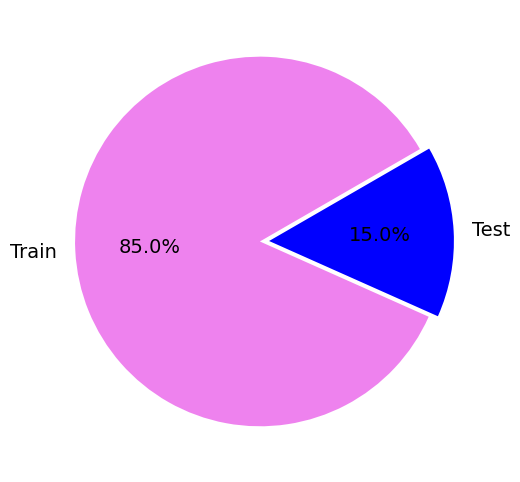

In [161]:
def plot_split():
  plt.figure(figsize=(14,6))
  colors = ['Violet' , 'Blue']
  plt.rcParams.update({'font.size': 14})
  plt.pie([len(x_train), len(x_test)],
  labels=['Train','Test'],
  colors=colors, autopct='%.1f%%', explode=(0.05,0),
  startangle=30);

plot_split()

In [168]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

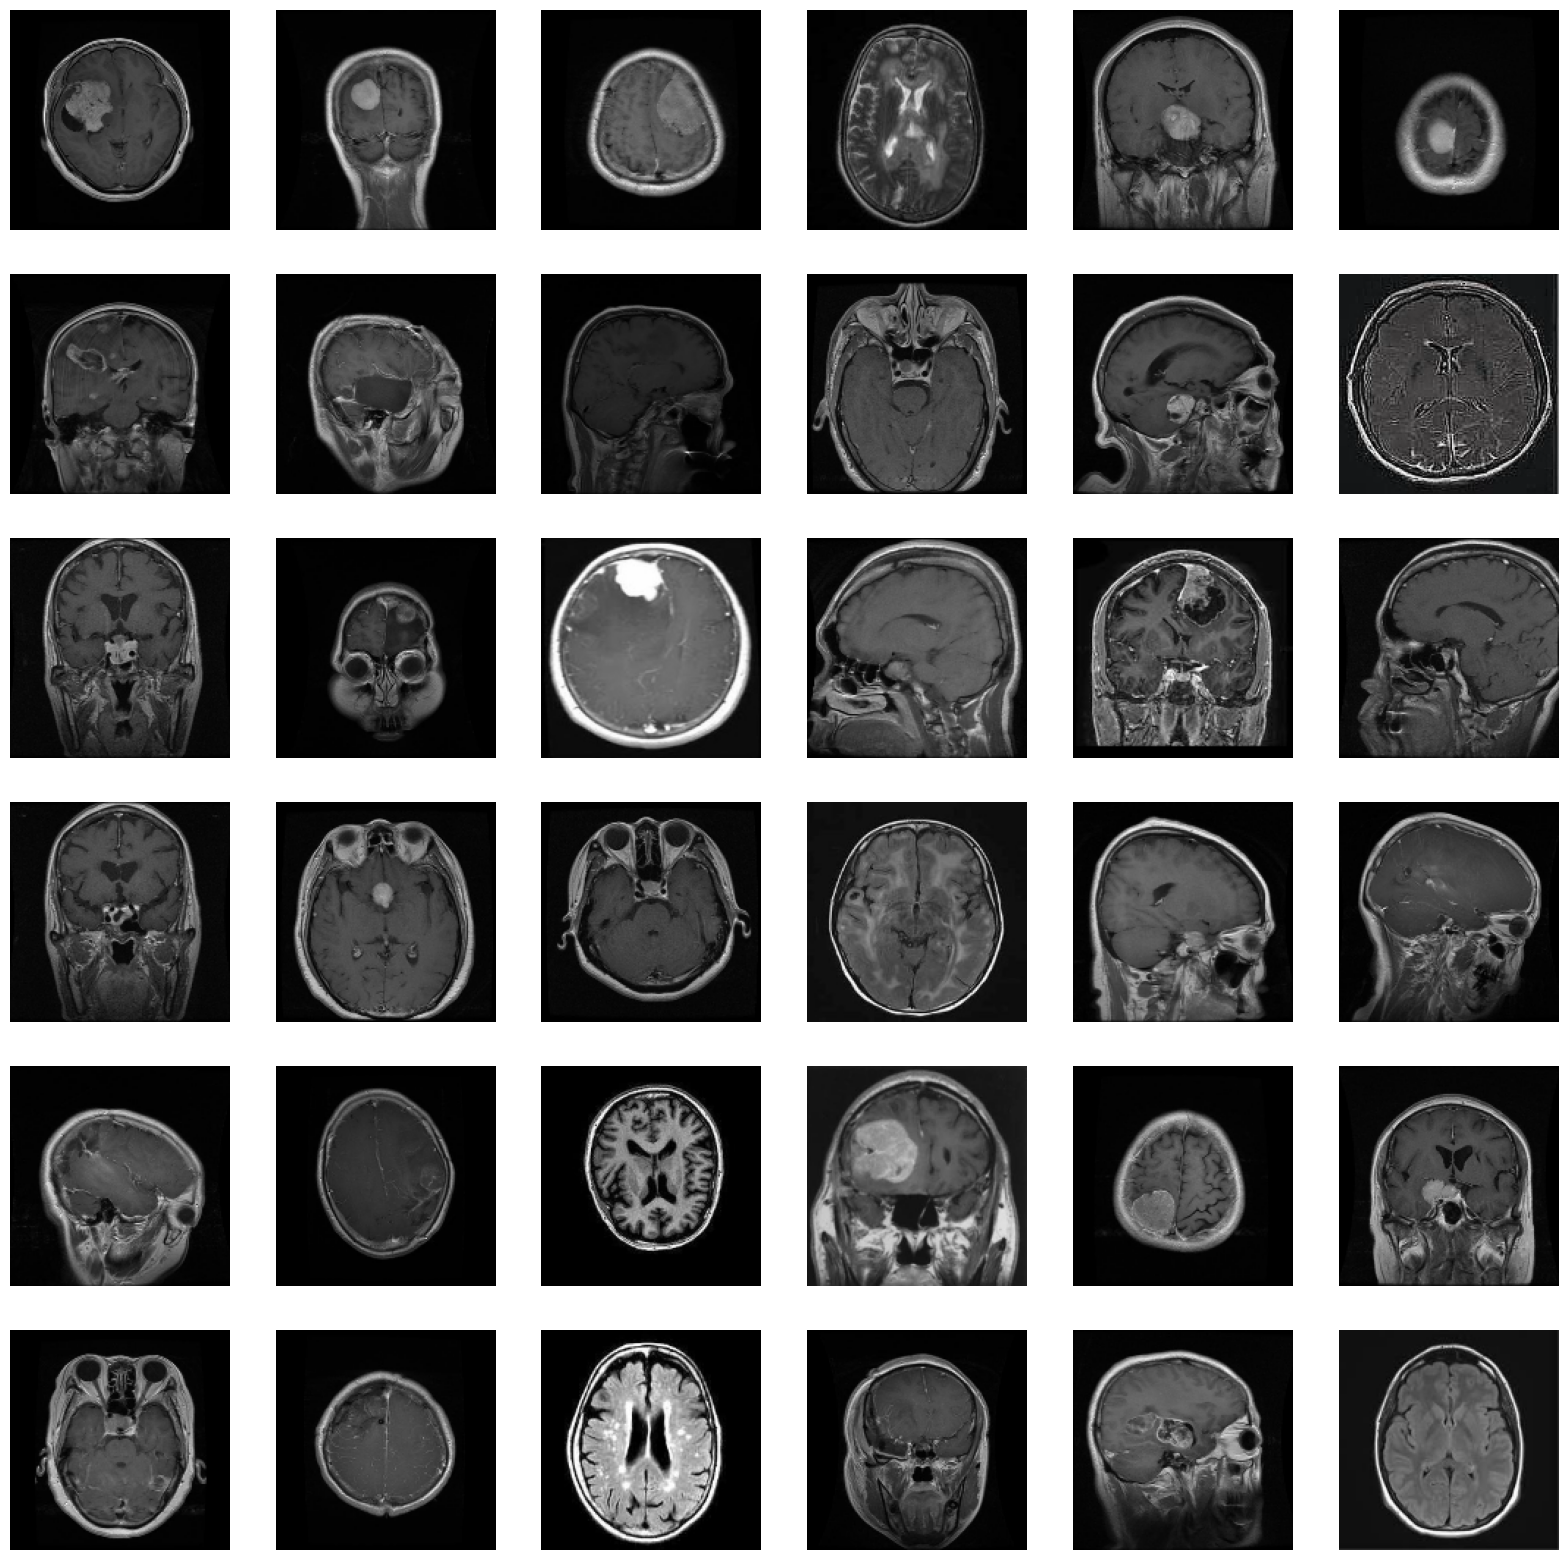

In [170]:
def sample_scans():
  plt.figure(figsize=(20,20))
  for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
      plt.subplot(6,6,n+1)
      plt.imshow(x_train[i])    
      plt.axis('off')
sample_scans()

In [172]:
def Modelling():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.3))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4, activation='softmax'))  # Updated the number of units to 4 and used 'softmax' activation
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Modelling()

In [173]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_36 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 73, 73, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_38 (Conv2D)          (None, 69, 69, 64)        36928     
                                 

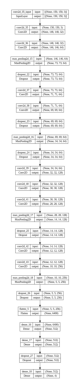

In [190]:
# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)

# Display the model architecture plot
image = plt.imread('model_architecture.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [175]:
def train():
  history = model.fit(x_train,y_train,epochs=100,validation_split=0.1)

train()


Epoch 1/100
168/168 [==============================] - 16s 95ms/step - loss: 0.1047 - accuracy: 0.9765 - val_loss: 0.0789 - val_accuracy: 0.9866
Epoch 2/100
168/168 [==============================] - 16s 94ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 0.0341 - val_accuracy: 0.9933
Epoch 3/100
168/168 [==============================] - 16s 93ms/step - loss: 0.0430 - accuracy: 0.9859 - val_loss: 0.0244 - val_accuracy: 0.9883
Epoch 4/100
168/168 [==============================] - 16s 94ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.3516 - val_accuracy: 0.9715
Epoch 5/100
168/168 [==============================] - 16s 96ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.1029 - val_accuracy: 0.9749
Epoch 6/100
168/168 [==============================] - 16s 96ms/step - loss: 0.0518 - accuracy: 0.9873 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 7/100
168/168 [==============================] - 16s 97ms/step - loss: 0.0385 - accuracy: 0.9894 - val_loss: 0.0371 - val_ac

In [176]:
model.save('mriscans.h5')

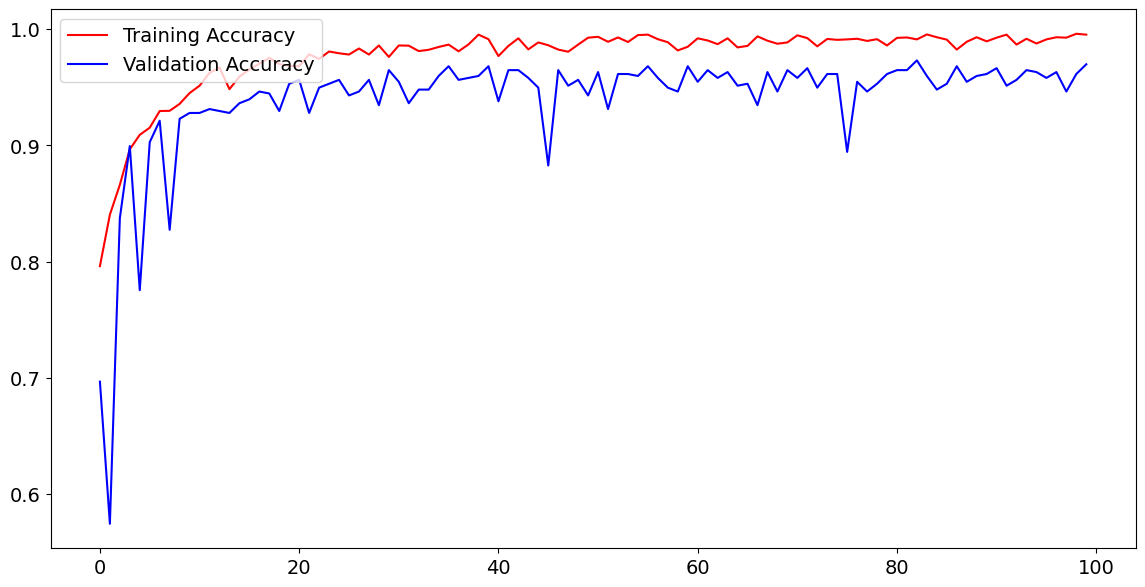

In [177]:
def train_vs_valid():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  fig = plt.figure(figsize=(14,7))
  plt.plot(epochs,acc,'r',label="Training Accuracy")
  plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
  plt.legend(loc='upper left')
  plt.show()

train_vs_valid()

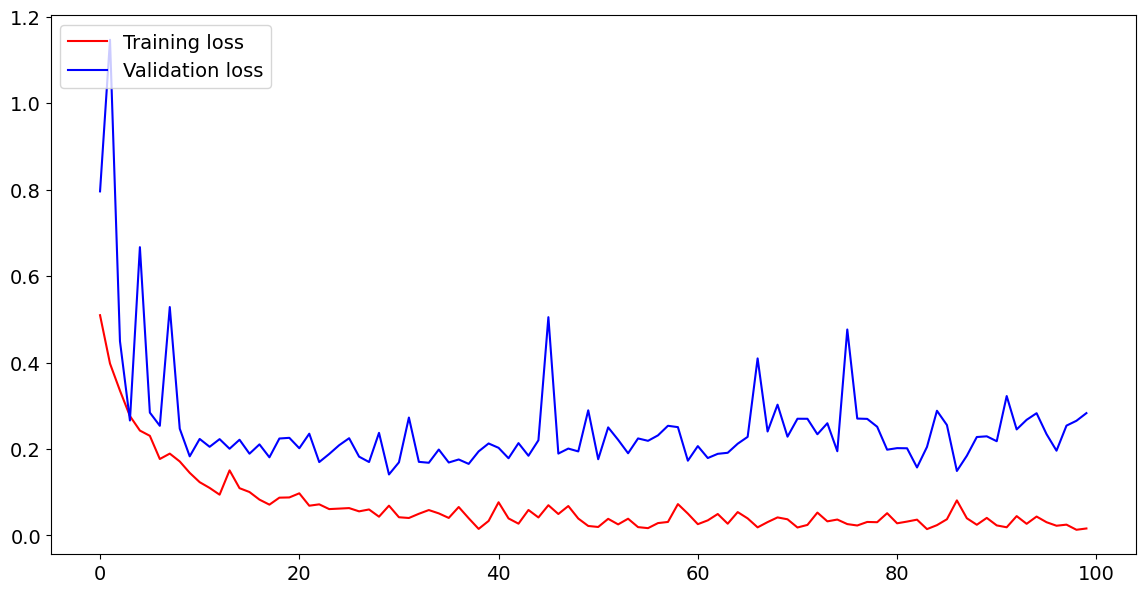

In [178]:
def loss():
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  fig = plt.figure(figsize=(14,7))
  plt.plot(epochs,loss,'r',label="Training loss")
  plt.plot(epochs,val_loss,'b',label="Validation loss")
  plt.legend(loc='upper left')
  plt.show()

loss()

**Data Evaluation**

In [181]:
def predict():
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)



  # Make predictions on the test data
  y_pred = model.predict(x_test)
  y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels (if applicable)

predict()
# Check the format of true labels and convert them accordingly
if y_test.ndim > 1 and y_test.shape[1] > 1:
    # Multilabel format, convert to multiclass
    y_test = np.argmax(y_test, axis=1)
else:
    # Multiclass format, no conversion needed
    y_test = y_test

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
report_df.to_csv('evaluation_report.csv', index=False)

33/33 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       237
           1       0.96      0.97      0.97       248
           2       1.00      0.99      1.00       322
           3       0.98      1.00      0.99       247

    accuracy                           0.98      1054
   macro avg       0.98      0.98      0.98      1054
weighted avg       0.98      0.98      0.98      1054



33/33 [==============================] - 1s 20ms/step


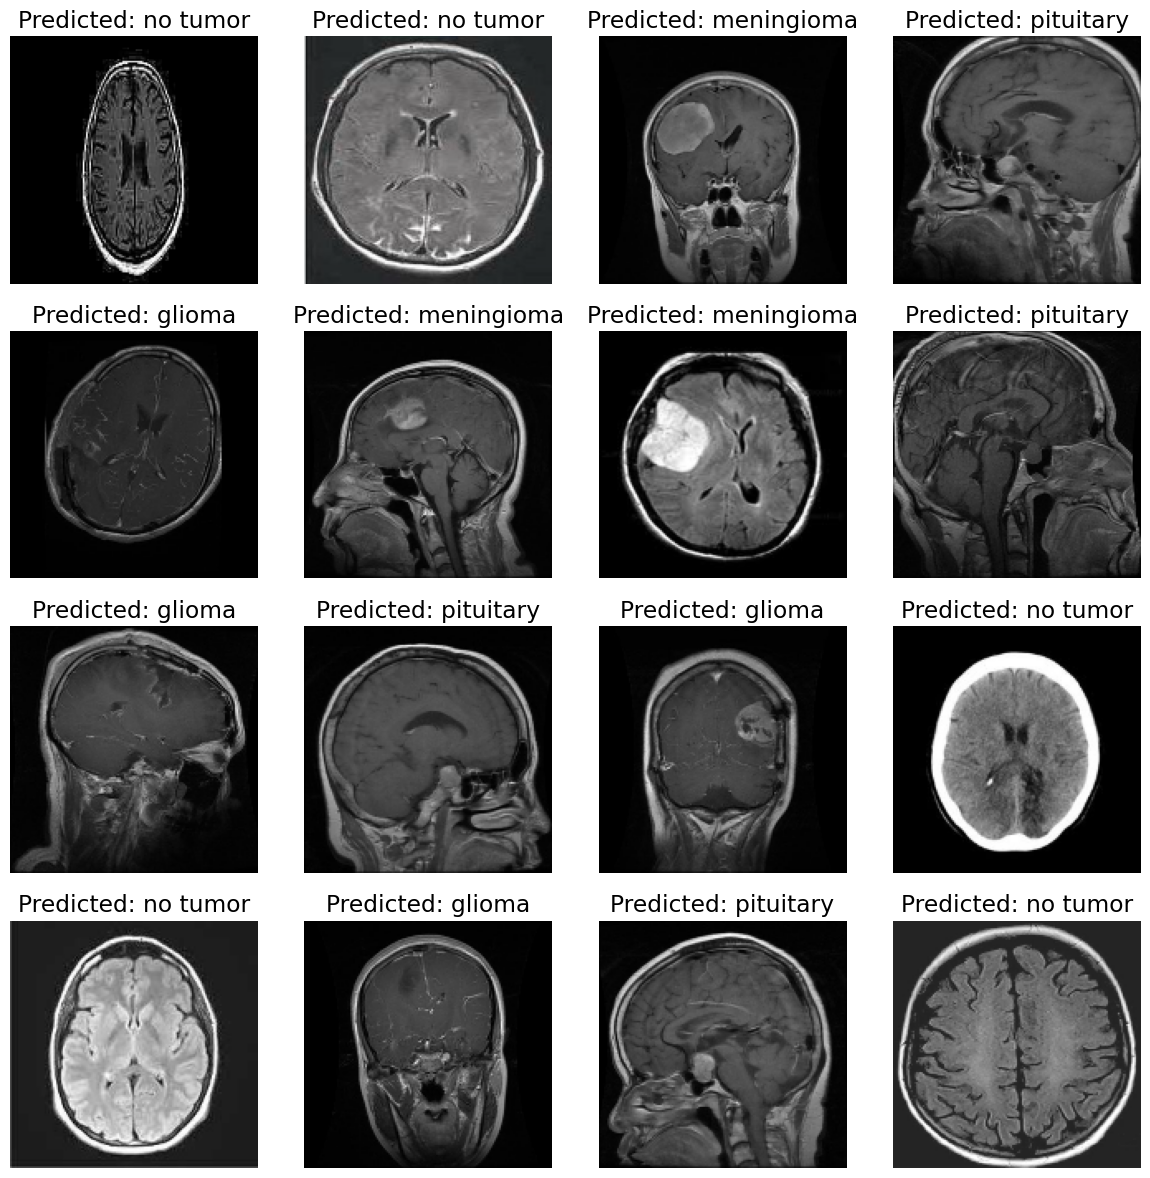

In [183]:
def show_predictions():
  predictions = model.predict(x_test)
  predicted_labels = np.argmax(predictions, axis=1)

  # Define the label mapping dictionary
  label_mapping = {0: 'glioma', 1: 'meningioma', 2: 'no tumor', 3: 'pituitary'}  # Add more labels if needed

  # Display a subset of the images and predictions
  num_images = len(x_test)
  num_display = 16  # Number of images to display
  display_indices = np.random.choice(num_images, size=num_display, replace=False)

  # Create the figure and subplots
  num_rows = int(np.ceil(num_display / 4))
  fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3*num_rows))

  # Iterate through the display indices and show the images and predictions
  for i, ax in enumerate(axes.flat):
      img_index = display_indices[i]
      ax.imshow(x_test[img_index])  # Assuming X_test contains the images in the appropriate format
      ax.axis('off')
      predicted_class = label_mapping[predicted_labels[img_index]]
      ax.set_title(f"Predicted: {predicted_class}")

  plt.tight_layout()
  plt.show()
show_predictions()

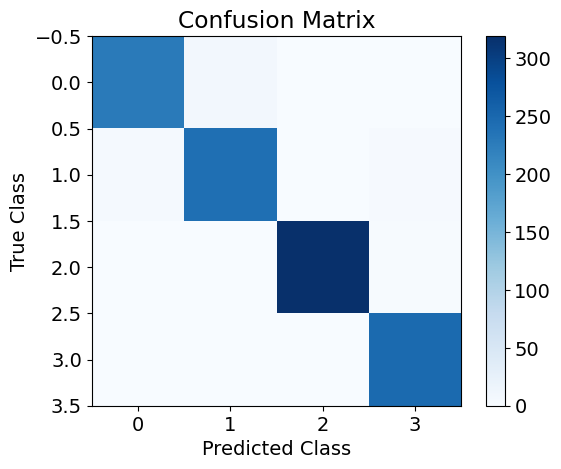

In [184]:
# Create confusion matrix

def confusionmatrix():
  cm = confusion_matrix(y_test, y_pred)

  # Plot confusion matrix
  plt.imshow(cm, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.xlabel('Predicted Class')
  plt.ylabel('True Class')
  plt.show()
confusionmatrix()

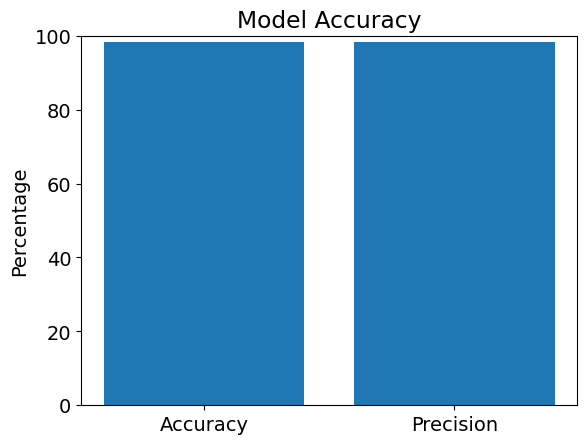

In [185]:
def accuracy_vs_precision():
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_percentage = accuracy * 100
  precision = precision_score(y_test, y_pred, average='weighted')
  precision_percentage = precision * 100
  # Print the accuracy percentage
  # Plot accuracy and precision
  labels = ['Accuracy', 'Precision']
  values = [accuracy * 100, precision * 100]
  plt.bar(labels, values)
  plt.ylim([0, 100])
  plt.ylabel('Percentage')
  plt.title('Model Accuracy')
  plt.show()
accuracy_vs_precision()

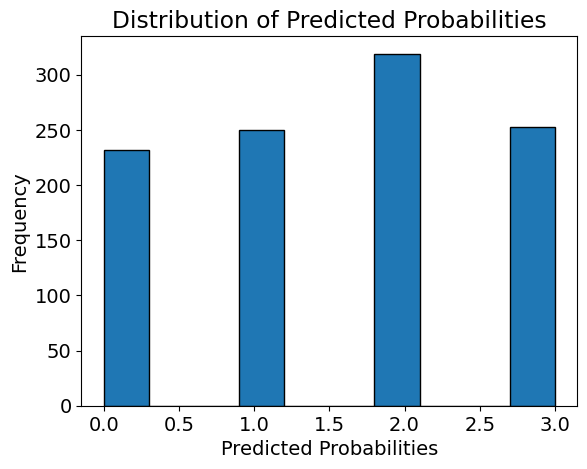

In [188]:
def pred_probabilities():
  # Plot the histogram
  plt.hist(y_pred, bins=10, edgecolor='black')
  plt.xlabel('Predicted Probabilities')
  plt.ylabel('Frequency')
  plt.title('Distribution of Predicted Probabilities')
  plt.show()
pred_probabilities()